In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exact Energies obtained from QMC 
exactE_4     = -0.4534132086591546
exactE_8     = -0.40518005298872917
exactE_12    = -0.3884864748124427
exactE_16    = -0.380514770608724

# Read in Data

### Demonstrating expressibility (QMC training only, using fulld dataset)

In [2]:
E_QMC_16_8_fulldata = np.loadtxt("experiments/16x16/nh8/QMC_Full/E_QMC_16_8_fulldata_smlr.dat")
E_QMC_16_16_fulldata = np.loadtxt("experiments/16x16/nh16/QMC_Full/E_QMC_16_16_fulldata_smlr.dat")
E_QMC_16_24_fulldata = np.loadtxt("experiments/16x16/nh24/QMC_Full/E_QMC_16_24_fulldata_smlr.dat")
E_QMC_16_32_fulldata = np.loadtxt("experiments/16x16/nh32/QMC_Full/E_QMC_16_32_fulldata_smlr.dat")
E_QMC_16_40_fulldata = np.loadtxt("experiments/16x16/nh40/QMC_Full/E_QMC_16_40_fulldata_smlr.dat")

In [3]:
print(len(E_QMC_16_8_fulldata))
print(len(E_QMC_16_16_fulldata))
print(len(E_QMC_16_24_fulldata))
print(len(E_QMC_16_32_fulldata))
print(len(E_QMC_16_40_fulldata))

848
829
739
684
674


^ This data not done running, will take a week or two more

### Comparing optimization methods (nh = 24, 32, 40)

In [4]:
E_QMC_16_24 = np.loadtxt("experiments/16x16/nh24/QMC_VMC/E_QMC_16_24.dat")
E_VMC_16_24 = np.loadtxt("experiments/16x16/nh24/VMC_Full/E_VMC_16_24.dat")

E_QMC_16_32 = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC_16_32.dat")
E_VMC_16_32 = np.loadtxt("experiments/16x16/nh32/VMC_Full/E_VMC_16_32.dat")

E_QMC_16_40 = np.loadtxt("experiments/16x16/nh40/QMC_VMC/E_QMC_16_40.dat")
E_VMC_16_40 = np.loadtxt("experiments/16x16/nh40/VMC_Full/E_VMC_16_40.dat")

In [5]:
print('QMC run lengths:')
print(len(E_QMC_16_24))
print(len(E_QMC_16_32))
print(len(E_QMC_16_40))
print('VMC run lengths:')
print(len(E_VMC_16_24))
print(len(E_VMC_16_32))
print(len(E_VMC_16_40))

QMC run lengths:
3000
3000
2000
VMC run lengths:
6447
5807
4730


^ Havent finished running the VMC runs (will keep running for 10,000+ steps). Havent started hybrid runs yet (was waiting on this preliminary data first)

# Plotting Functions

### Energy Plotting Funciton (for QMC training with full dataset)

In [6]:
def QMCPlot(N,lr,exactE,qmc_8,qmc_16,qmc_24,qmc_32,qmc_40,xlim,ylim):

    fig = plt.figure(1,figsize=(6,4), dpi=120, facecolor='w', edgecolor='k')
    
    plt.plot(qmc_8,marker='o',markersize=1,linewidth=0.0,markevery=1,label="nh = 8")
    plt.plot(qmc_16,marker='o',markersize=1,linewidth=0.0,markevery=1,label="nh = 16")
    plt.plot(qmc_24,marker='o',markersize=1,linewidth=0.0,markevery=1,label="nh = 24")
    plt.plot(qmc_32,marker='o',markersize=1,linewidth=0.0,markevery=1,label="nh = 32")
    plt.plot(qmc_40,marker='o',markersize=1,linewidth=0.0,markevery=1,label="nh = 40")

    plt.hlines(exactE,0, 1000 ,linestyle="--",label="Exact")

    plt.xlabel("Step",fontsize=15)
    plt.ylabel("$\\langle H \\rangle$",fontsize=20)
    plt.title("{} x {} Lattice, Learning Rate = {}".format(N,N,lr))
    plt.legend(loc="best")
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])

    plt.show()

### Energy Plotting Function (for comparing optimization methods)

In [7]:
def PlotE(N,lr,nh,exact_energy,qmc_energy,vmc_energy,qmc_vmc_energy,xlim,ylim):

    fig = plt.figure(1,figsize=(6,4), dpi=120, facecolor='w', edgecolor='k')
 
    plt.plot(vmc_energy,marker='o',markersize=1,linewidth=0.0,markevery=1,label="VMC")
    plt.plot(qmc_energy,marker='s',markersize=1,linewidth=0.0,markevery=1,label="QMC")
    #plt.plot(qmc_vmc_energy,marker='^',markersize=1,linewidth=0.0,markevery=1,label="950 epochs QMC, 5050 epochs QMC")

    plt.hlines(exact_energy,0, 10000 ,linestyle="--",label="Exact")  
    #plt.vlines(200,-0.4,-0.1,linestyle="--",color='r',label="QMC VMC transition")


    plt.xlabel("Step",fontsize=15)
    plt.ylabel("$\\langle H \\rangle$",fontsize=20)
    plt.title("{} x {} Lattice, Learning Rate = {}, NH = {}".format(N,N,lr,nh))
    plt.legend(loc="best")
    
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])

    plt.show()

### Energy Difference Plotting Function

### Time to Convergence Plotting Function

# Plots

### Demonstrating Expressibility 

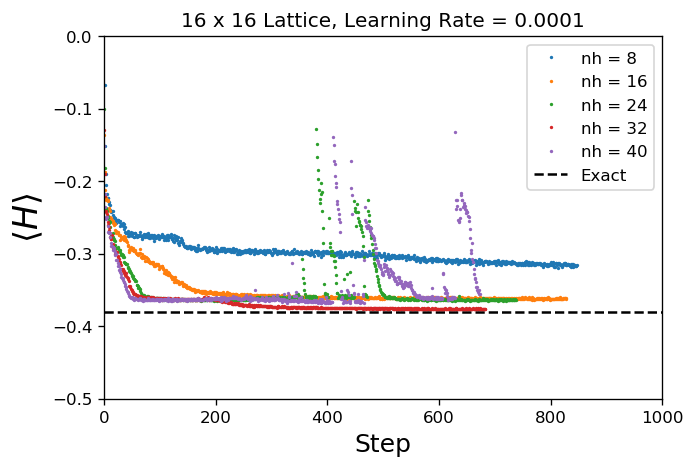

In [8]:
QMCPlot(16, 0.0001, exactE_16, E_QMC_16_8_fulldata,E_QMC_16_16_fulldata,E_QMC_16_24_fulldata,E_QMC_16_32_fulldata,E_QMC_16_40_fulldata,[0,1000],[-0.5,0])

### Comparing optimization methods

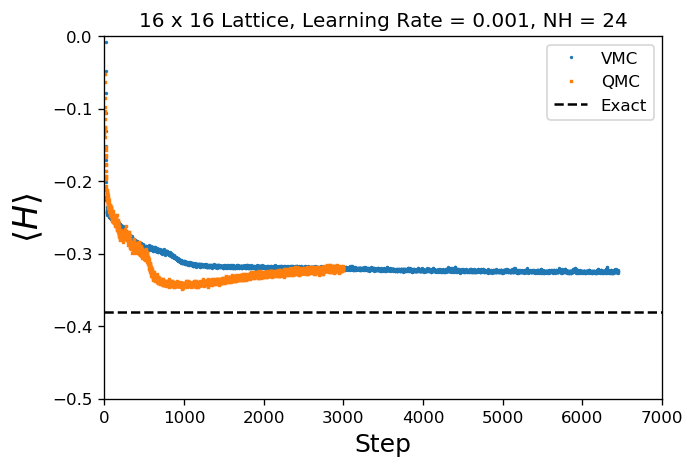

In [11]:
E_QMC_VMC_16_24 = np.zeros(len(E_QMC_16_24))
PlotE(16,0.001,24,exactE_16,E_QMC_16_24,E_VMC_16_24,E_QMC_VMC_16_24,[0,7000],[-0.5,0])

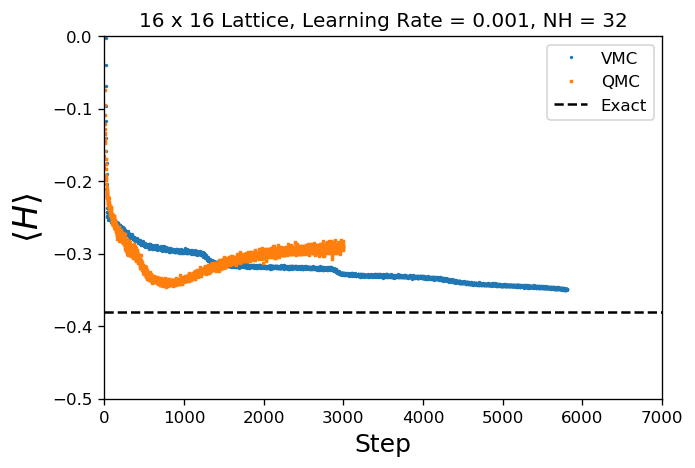

In [12]:
E_QMC_VMC_16_32 = np.zeros(len(E_QMC_16_32))
PlotE(16,0.001,32,exactE_16,E_QMC_16_32,E_VMC_16_32,E_QMC_VMC_16_32,[0,7000],[-0.5,0])

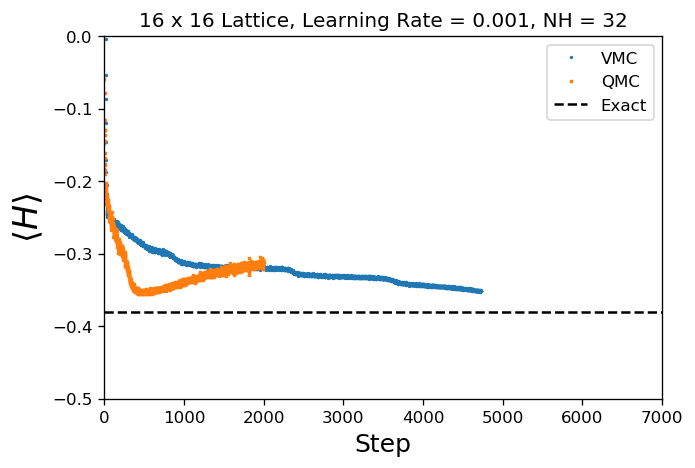

In [13]:
E_QMC_VMC_16_40 = np.zeros(len(E_QMC_16_40))
PlotE(16,0.001,32,exactE_16,E_QMC_16_40,E_VMC_16_40,E_QMC_VMC_16_40,[0,7000],[-0.5,0])